In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import missingno as msno
import nltk

In [2]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
faketxt= pd.DataFrame(fake,columns=['title','text'])
faketxt['value']='false'

In [6]:
truetxt= pd.DataFrame(true,columns=['title','text'])
truetxt['value']='true'

In [7]:
faketxt.head()

,title,text,value
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,false
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,false
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",false
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",false
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,false


In [8]:
truetxt.head()

,title,text,value
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


In [9]:
df = truetxt.append(faketxt)

In [10]:
df.head()

,title,text,value
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


In [11]:
df.shape

(44898, 3)

In [12]:
df = df.sample(frac = 1) 

In [13]:
df.head()

,title,text,value
18154,U.S. says 'deeply concerned' about Kenya ahead...,WASHINGTON (Reuters) - The U.S. government is ...,true
9444,WATCH: SEAN HANNITY FANS Make HILARIOUS Videos...,When Keurig decided to side with Soros against...,false
17706,Syrian army battles Islamic State in al-Mayadi...,BEIRUT (Reuters) - The Syrian army and its all...,true
320,White House says government shutdown always a ...,WASHINGTON (Reuters) - As the U.S. Congress wo...,true
6351,Bill Maher SCORCHES Republicans: Stop Blaming...,Since the rise of presumptive Republican nomin...,false


In [14]:
df= df.reset_index()

In [15]:
df.head()

,index,title,text,value
0,18154,U.S. says 'deeply concerned' about Kenya ahead...,WASHINGTON (Reuters) - The U.S. government is ...,true
1,9444,WATCH: SEAN HANNITY FANS Make HILARIOUS Videos...,When Keurig decided to side with Soros against...,false
2,17706,Syrian army battles Islamic State in al-Mayadi...,BEIRUT (Reuters) - The Syrian army and its all...,true
3,320,White House says government shutdown always a ...,WASHINGTON (Reuters) - As the U.S. Congress wo...,true
4,6351,Bill Maher SCORCHES Republicans: Stop Blaming...,Since the rise of presumptive Republican nomin...,false


In [16]:
del df['index']
df.head()

,title,text,value
0,U.S. says 'deeply concerned' about Kenya ahead...,WASHINGTON (Reuters) - The U.S. government is ...,true
1,WATCH: SEAN HANNITY FANS Make HILARIOUS Videos...,When Keurig decided to side with Soros against...,false
2,Syrian army battles Islamic State in al-Mayadi...,BEIRUT (Reuters) - The Syrian army and its all...,true
3,White House says government shutdown always a ...,WASHINGTON (Reuters) - As the U.S. Congress wo...,true
4,Bill Maher SCORCHES Republicans: Stop Blaming...,Since the rise of presumptive Republican nomin...,false


In [17]:
import string

In [18]:
def removetxt(text):
    nt = ''.join([char for char in text if char not in string.punctuation])
    return nt
df1 = df
df1['title'] = df1.title.apply(lambda x: removetxt(x))
df1['text'] = df1.text.apply(lambda x: removetxt(x))

In [19]:
df1.head()

,title,text,value
0,US says deeply concerned about Kenya ahead of ...,WASHINGTON Reuters The US government is deep...,true
1,WATCH SEAN HANNITY FANS Make HILARIOUS Videos ...,When Keurig decided to side with Soros against...,false
2,Syrian army battles Islamic State in alMayadin...,BEIRUT Reuters The Syrian army and its allies...,true
3,White House says government shutdown always a ...,WASHINGTON Reuters As the US Congress worked ...,true
4,Bill Maher SCORCHES Republicans Stop Blaming ...,Since the rise of presumptive Republican nomin...,false


In [20]:
import re

In [21]:
def token(txt):
    tk = re.split('\W',txt)
    return tk
df2 = pd.DataFrame()
df2['title'] = df1.title.apply(lambda x: token(x.lower()))
df2['text'] = df1.text.apply(lambda x: token(x.lower()))
df2['value']=df1.value

In [22]:
df2.head()

,title,text,value
0,"[us, says, deeply, concerned, about, kenya, ah...","[washington, reuters, , the, us, government, i...",true
1,"[watch, sean, hannity, fans, make, hilarious, ...","[when, keurig, decided, to, side, with, soros,...",false
2,"[syrian, army, battles, islamic, state, in, al...","[beirut, reuters, , the, syrian, army, and, it...",true
3,"[white, house, says, government, shutdown, alw...","[washington, reuters, , as, the, us, congress,...",true
4,"[, bill, maher, scorches, republicans, stop, b...","[since, the, rise, of, presumptive, republican...",false


In [23]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\InnovusDrac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
def removestop(text):
    text = [word for word in text if word not in stopword]
    return text
df2['title'] = df2.title.apply(lambda x: removestop(x))
df2['text'] = df2.text.apply(lambda x: removestop(x))

In [25]:
df2.head()

,title,text,value
0,"[us, says, deeply, concerned, kenya, ahead, el...","[washington, reuters, , us, government, , deep...",true
1,"[watch, sean, hannity, fans, make, hilarious, ...","[keurig, decided, side, soros, sean, hannity, ...",false
2,"[syrian, army, battles, islamic, state, almaya...","[beirut, reuters, , syrian, army, allies, capt...",true
3,"[white, house, says, government, shutdown, alw...","[washington, reuters, , us, congress, worked, ...",true
4,"[, bill, maher, scorches, republicans, stop, b...","[since, rise, presumptive, republican, nominee...",false


In [26]:
print('There are {} null values'.format(len(df2)-len(df2.dropna())))

There are 0 null values


In [27]:
df.head()

,title,text,value
0,US says deeply concerned about Kenya ahead of ...,WASHINGTON Reuters The US government is deep...,true
1,WATCH SEAN HANNITY FANS Make HILARIOUS Videos ...,When Keurig decided to side with Soros against...,false
2,Syrian army battles Islamic State in alMayadin...,BEIRUT Reuters The Syrian army and its allies...,true
3,White House says government shutdown always a ...,WASHINGTON Reuters As the US Congress worked ...,true
4,Bill Maher SCORCHES Republicans Stop Blaming ...,Since the rise of presumptive Republican nomin...,false


In [28]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\InnovusDrac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
def lem(text):
    text = [wn.lemmatize(word) for word in text if word not in stopword]
    return text
df2['title'] = df2.title.apply(lambda x: lem(x))
df2['text'] = df2.text.apply(lambda x: lem(x))

In [30]:
df2.head()

,title,text,value
0,"[u, say, deeply, concerned, kenya, ahead, elec...","[washington, reuters, , u, government, , deepl...",true
1,"[watch, sean, hannity, fan, make, hilarious, v...","[keurig, decided, side, soros, sean, hannity, ...",false
2,"[syrian, army, battle, islamic, state, almayad...","[beirut, reuters, , syrian, army, ally, captur...",true
3,"[white, house, say, government, shutdown, alwa...","[washington, reuters, , u, congress, worked, r...",true
4,"[, bill, maher, scorch, republican, stop, blam...","[since, rise, presumptive, republican, nominee...",false


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
ps = nltk.PorterStemmer()

In [35]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text
vect = CountVectorizer(analyzer=clean_text)
df3 = pd.DataFrame(df2, columns=['values','text'])

In [43]:
X_counts = vect.fit_transform(df.text)
#X_counts = vect.fit_transform(df2.title)

In [44]:
X_counts.shape

(44898, 197817)

In [45]:
vect.get_feature_names()

['',
 '0',
 '00',
 '000',
 '0000',
 '000000017',
 '000004',
 '000048',
 '000063sz',
 '00007',
 '00009',
 '0001',
 '00011',
 '00018',
 '000270k',
 '0005',
 '0006',
 '00075',
 '00076',
 '0009',
 '000938sz',
 '000dillon000',
 '001',
 '0018',
 '0019',
 '001wampampnbampampw2obfunctionvar',
 '002',
 '0020',
 '003',
 '0036',
 '004',
 '0040',
 '0041',
 '0047',
 '0050',
 '005380k',
 '005930k',
 '00654',
 '007',
 '007kzman',
 '008',
 '009',
 '00hex',
 '00ob0sbm3wampampw4obt1yyb01y2ytampampb11ampampu1zquot3quottampampibpvoid',
 '01',
 '0100',
 '01000110',
 '01010101',
 '0109',
 '011',
 '0112',
 '012017',
 '01233',
 '01262016',
 '0129',
 '0130',
 '0130pm',
 '0134',
 '013percent',
 '014',
 '015',
 '015760k',
 '016',
 '017',
 '0189the',
 '019',
 '02',
 '020',
 '0200',
 '0207',
 '0211',
 '022',
 '0225',
 '023',
 '0232',
 '0235',
 '024',
 '025',
 '02505',
 '0259',
 '025harlow',
 '027',
 '029',
 '03',
 '030',
 '0300',
 '0307',
 '0310',
 '0311',
 '032',
 '033',
 '0330',
 '0335',
 '0340',
 '0342',
 '0344

In [48]:
X_counts

<44898x197817 sparse matrix of type '<class 'numpy.int64'>'
	with 7007410 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df.text)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(44898, 197817)
['', '0', '00', '000', '0000', '000000017', '000004', '000048', '000063sz', '00007', '00009', '0001', '00011', '00018', '000270k', '0005', '0006', '00075', '00076', '0009', '000938sz', '000dillon000', '001', '0018', '0019', '001wampampnbampampw2obfunctionvar', '002', '0020', '003', '0036', '004', '0040', '0041', '0047', '0050', '005380k', '005930k', '00654', '007', '007kzman', '008', '009', '00hex', '00ob0sbm3wampampw4obt1yyb01y2ytampampb11ampampu1zquot3quottampampibpvoid', '01', '0100', '01000110', '01010101', '0109', '011', '0112', '012017', '01233', '01262016', '0129', '0130', '0130pm', '0134', '013percent', '014', '015', '015760k', '016', '017', '0189the', '019', '02', '020', '0200', '0207', '0211', '022', '0225', '023', '0232', '0235', '024', '025', '02505', '0259', '025harlow', '027', '029', '03', '030', '0300', '0307', '0310', '0311', '032', '033', '0330', '0335', '0340', '0342', '0344', '035', '036', '038', '04', '040', '0400', '0401', '04051951dad', '0406', '04

In [61]:
dfo = truetxt.append(faketxt)
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

dfo['body punct%'] = dfo.text.apply(lambda x: count_punct(x))
dfo['title punct%'] = dfo.title.apply(lambda x: count_punct(x))
dfo.head()

ZeroDivisionError: division by zero

In [90]:
count1 = sum([1 for char in st if char in string.punctuation])
count2 = sum([1 for char in dfo.text if char not in string.punctuation])
print(count1, count2)
total = 0
for char in dfo.text:
    total = char == st
print(total)
st = string.punctuation

#print(re.findall(st, dfo.text))


32 44898
False


In [58]:
df3['punct%'] = df3.text.apply(lambda x: count_punct(x))

df3.head()

,values,text,punct%
0,NaN,"[washington, reuters, , u, government, , deepl...",15.1
1,NaN,"[keurig, decided, side, soros, sean, hannity, ...",4.6
2,NaN,"[beirut, reuters, , syrian, army, ally, captur...",4.8
3,NaN,"[washington, reuters, , u, congress, worked, r...",8.0
4,NaN,"[since, rise, presumptive, republican, nominee...",4.2


In [67]:
dfo.head()

,title,text,value
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true


In [107]:
def punt(text):
    count = sum([1 for char in text if char in st])
    return round(count/(len(text) - text.count(" ")), 3)*100
#dfo['try'] = dfo.text.apply(lambda x: punt(x))

In [108]:
dfo['try2'] = dfo['try'].apply(lambda x: punt(x))
dfo.head()

ZeroDivisionError: division by zero

In [110]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

dfo['count_punct'] = dfo.text.apply(lambda s: count(s, string.punctuation))

In [111]:
dfo.head()

,title,text,value,try,count_punct
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true,"[(, ), -, ., ., ,, ,, ., ,, ., ., ,, ,, ,, ., ...",118
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true,"[(, ), -, ., ., ,, ,, ., ,, ,, ., ., ., ., ,, ...",77
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true,"[(, ), -, ,, ,, ., ,, ,, ., ., ,, ., ., ., ., ...",47
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true,"[(, ), -, ,, ., ,, ,, -, ,, ., ,, ,, ,, ., ., ...",51
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true,"[/, (, ), -, ., ., (, ., ), ,, ., ,, ,, ,, ?, ...",136


In [140]:
def punt(text):
    jud = pd.DataFrame(data={'this':[text]})
    cont = jud.apply(lambda s: count(s, string.punctuation))
    return text
    #return round(cont/(len(text)), 3)*100

In [158]:
dfo.head()

,title,text,value,try,count_punct,try2,count_ws
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true,"[(, ), -, ., ., ,, ,, ., ,, ., ., ,, ,, ,, ., ...",118,WASHINGTON (Reuters) - The head of a conservat...,752
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true,"[(, ), -, ., ., ,, ,, ., ,, ,, ., ., ., ., ,, ...",77,WASHINGTON (Reuters) - Transgender people will...,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true,"[(, ), -, ,, ,, ., ,, ,, ., ., ,, ., ., ., ., ...",47,WASHINGTON (Reuters) - The special counsel inv...,465
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true,"[(, ), -, ,, ., ,, ,, -, ,, ., ,, ,, ,, ., ., ...",51,WASHINGTON (Reuters) - Trump campaign adviser ...,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true,"[/, (, ), -, ., ., (, ., ), ,, ., ,, ,, ,, ?, ...",136,SEATTLE/WASHINGTON (Reuters) - President Donal...,863


In [167]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

dfo['count_ws'] = dfo.text.apply(lambda s: count(s, ' '))
dfo['try2']=dfo['count_punct']/(len(dfo['text'])-dfo['count_ws'])*100


In [168]:
dfo.head()

,title,text,value,try,count_punct,try2,count_ws
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true,"[(, ), -, ., ., ,, ,, ., ,, ., ., ,, ,, ,, ., ...",118,0.267295,752
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true,"[(, ), -, ., ., ,, ,, ., ,, ,, ., ., ., ., ,, ...",77,0.173917,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true,"[(, ), -, ,, ,, ., ,, ,, ., ., ,, ., ., ., ., ...",47,0.105777,465
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true,"[(, ), -, ,, ., ,, ,, -, ,, ., ,, ,, ,, ., ., ...",51,0.114550,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true,"[/, (, ), -, ., ., (, ., ), ,, ., ,, ,, ,, ?, ...",136,0.308845,863


In [171]:
dfo['body_len'] = dfo['text'].apply(lambda x: len(x) - x.count(" "))

dfo.head()

,title,text,value,try,count_punct,try2,count_ws,body_len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,true,"[(, ), -, ., ., ,, ,, ., ,, ., ., ,, ,, ,, ., ...",118,0.267295,752,3907
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,true,"[(, ), -, ., ., ,, ,, ., ,, ,, ., ., ., ., ,, ...",77,0.173917,624,3453
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true,"[(, ), -, ,, ,, ., ,, ,, ., ., ,, ., ., ., ., ...",47,0.105777,465,2324
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true,"[(, ), -, ,, ., ,, ,, -, ,, ., ,, ,, ,, ., ., ...",51,0.114550,376,2085
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true,"[/, (, ), -, ., ., (, ., ), ,, ., ,, ,, ,, ?, ...",136,0.308845,863,4341


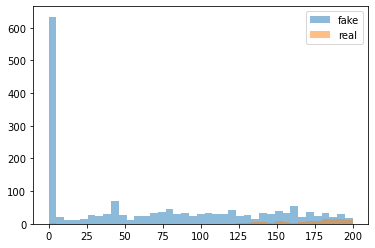

In [181]:
bins = np.linspace(0, 200, 40)

plt.hist(dfo[dfo['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

In [180]:
print('There are {} null values'.format(len(df2)-len(dfo['text'].dropna())))

There are 0 null values


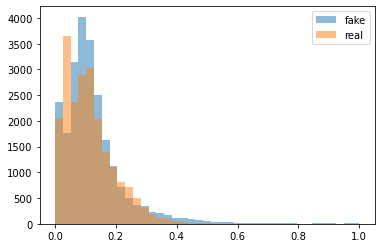

In [183]:
bins = np.linspace(0,1, 40)

plt.hist(dfo[dfo['value']=='false']['try2'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['try2'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

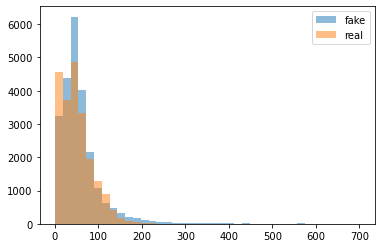

In [186]:
bins = np.linspace(0, 700, 40)

plt.hist(dfo[dfo['value']=='false']['count_punct'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_punct'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

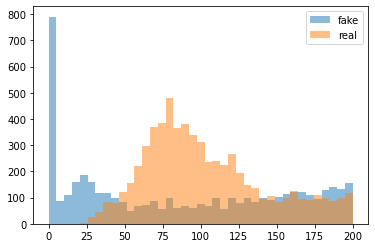

In [185]:
bins = np.linspace(0, 200, 40)

plt.hist(dfo[dfo['value']=='false']['count_ws'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_ws'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Body length dist')

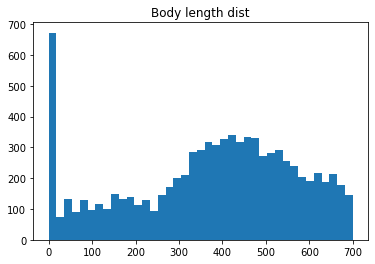

In [190]:
plt.hist(dfo['body_len'],bins)
plt.title('Body length dist')

Text(0.5, 1.0, 'Punctuation dist')

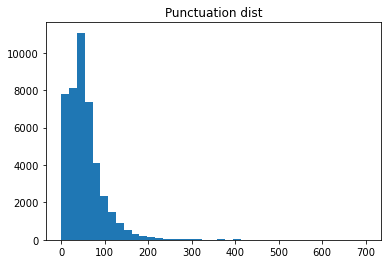

In [193]:
plt.hist(dfo['count_punct'],bins)
plt.title('Punctuation dist')

Text(0.5, 1.0, 'White Space length dist')

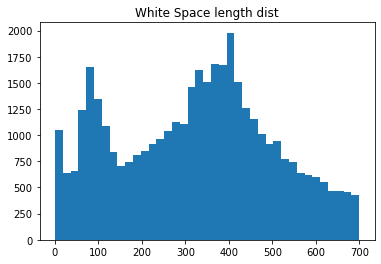

In [192]:
plt.hist(dfo['count_ws'],bins)
plt.title('White Space length dist')

Text(0.5, 1.0, 'Body length dist')

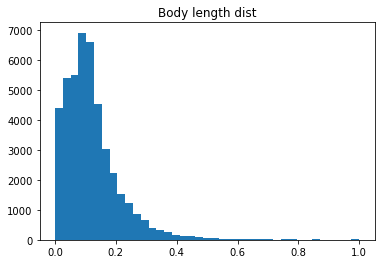

In [197]:
bins = np.linspace(0,1, 40)
plt.hist(dfo['try2'],bins)
plt.title('Body length dist')

In [198]:
dfo[dfo['body_len']==0]

,title,text,value,try,count_punct,try2,count_ws,body_len
8970,Graphic: Supreme Court roundup,,true,[],0,0.0,1,0
10923,TAKE OUR POLL: Who Do You Think President Trum...,,false,[],0,0.0,1,0
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,false,[],0,0.0,1,0
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,false,[],0,0.0,1,0
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,false,[],0,0.0,1,0
...,...,...,...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,false,[],0,0.0,1,0
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,false,[],0,0.0,1,0
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,false,[],0,0.0,1,0
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,false,[],0,0.0,1,0


In [200]:
dfn = dfo.drop(dfo['body_len']==0)
dfn.head()

,title,text,value,try,count_punct,try2,count_ws,body_len
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,true,"[(, ), -, ,, ,, ., ,, ,, ., ., ,, ., ., ., ., ...",47,0.105777,465,2324
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,true,"[(, ), -, ,, ., ,, ,, -, ,, ., ,, ,, ,, ., ., ...",51,0.114550,376,2085
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,true,"[/, (, ), -, ., ., (, ., ), ,, ., ,, ,, ,, ?, ...",136,0.308845,863,4341
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",true,"[,, ., /, (, ), -, ,, ., ., ., ,, -, -, ,, ,, ...",85,0.191882,600,3107
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",true,"[,, (, ), -, ., ., ,, ., ,, ., ,, ,, ., ., ., ...",65,0.146528,538,2682


Text(0.5, 1.0, 'Body length dist')

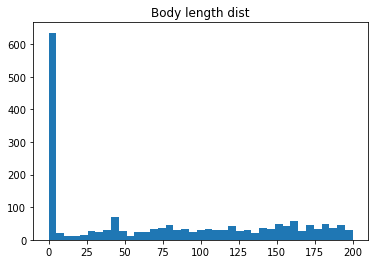

In [203]:
bins = np.linspace(0, 200, 40)
plt.hist(dfn['body_len'],bins)
plt.title('Body length dist')

In [208]:
dfn = dfn.replace(0,np.nan)
dfn[dfn['body_len']==0]

,title,text,value,try,count_punct,try2,count_ws,body_len


In [209]:
dfn = dfn.dropna()

Text(0.5, 1.0, 'Body length dist')

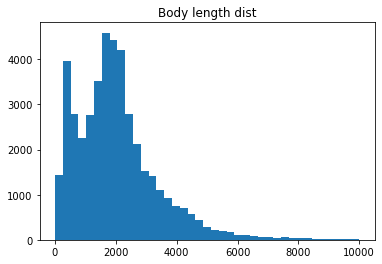

In [226]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn['body_len'],bins)
plt.title('Body length dist')

Text(0.5, 1.0, 'punct % dist')

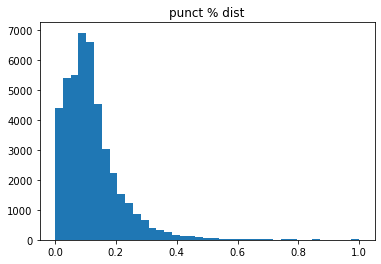

In [212]:
bins = np.linspace(0,1, 40)
plt.hist(dfo['try2'],bins)
plt.title('punct % dist')

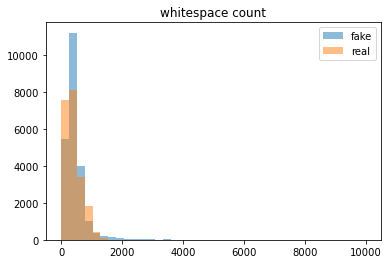

In [224]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn[dfn['value']=='false']['count_ws'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['count_ws'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('whitespace count')
plt.show()

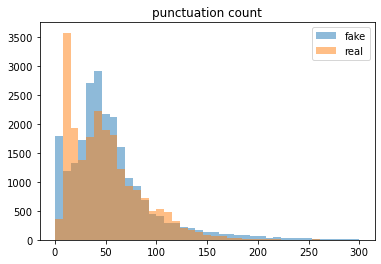

In [225]:
bins = np.linspace(0, 300, 40)

plt.hist(dfo[dfo['value']=='false']['count_punct'], bins, alpha=0.5, label='fake')
plt.hist(dfo[dfo['value']=='true']['count_punct'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('punctuation count')
plt.show()

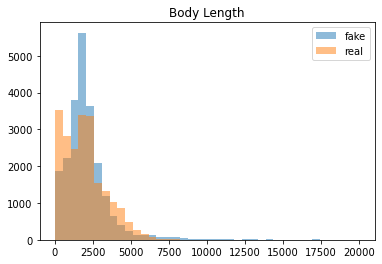

In [222]:
bins = np.linspace(0, 20000, 40)

plt.hist(dfn[dfn['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('Body Length')
plt.show()

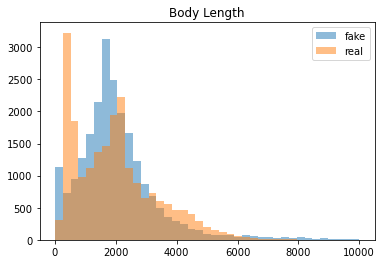

In [223]:
bins = np.linspace(0, 10000, 40)

plt.hist(dfn[dfn['value']=='false']['body_len'], bins, alpha=0.5, label='fake')
plt.hist(dfn[dfn['value']=='true']['body_len'], bins, alpha=0.5, label='real')
plt.legend(loc='upper right')
plt.title('Body Length')
plt.show()

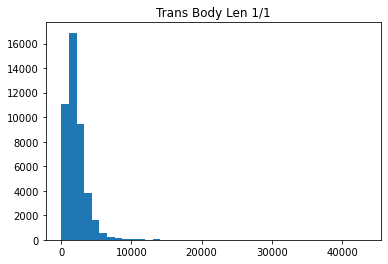

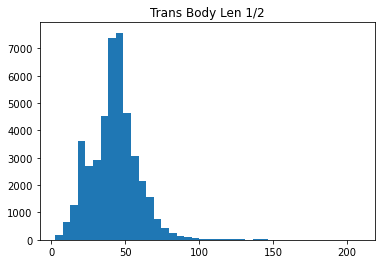

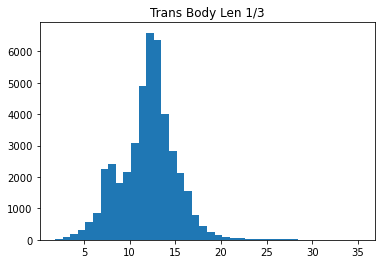

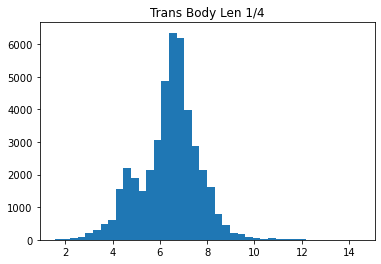

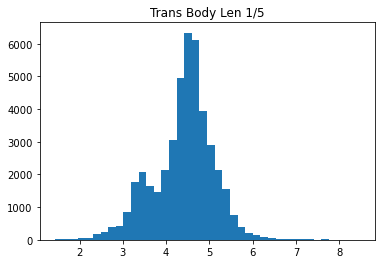

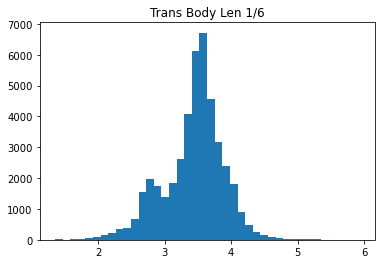

In [232]:
for i in [1,2,3,4,5,6]:
    plt.hist((dfn['body_len'])**(1/i),bins=40)
    plt.title('Trans Body Len 1/{}'.format(str(i)))
    plt.show()

In [261]:
#body_len 1/5 is the best distrobution
dfn['body_len']=(dfn['body_len'])**(1/5)

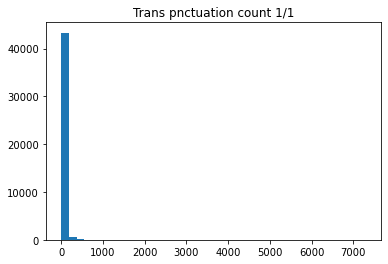

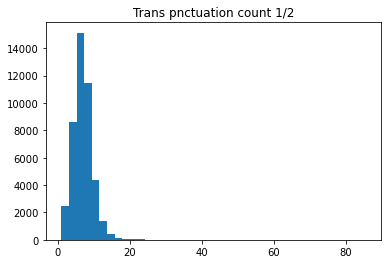

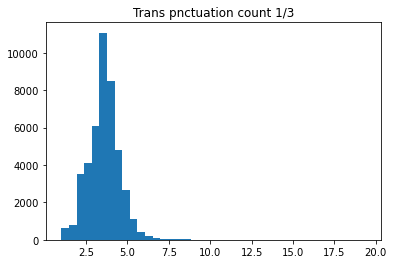

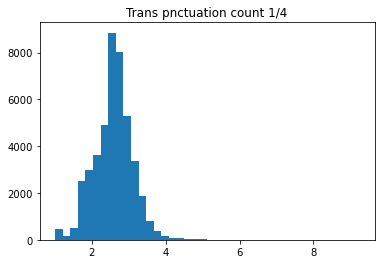

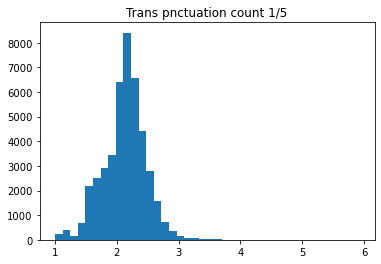

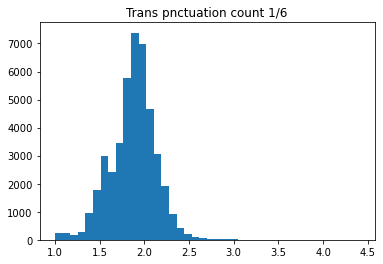

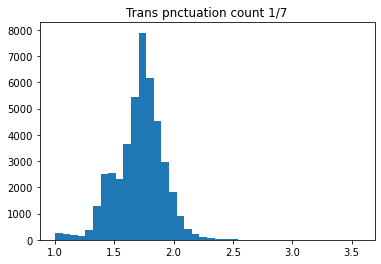

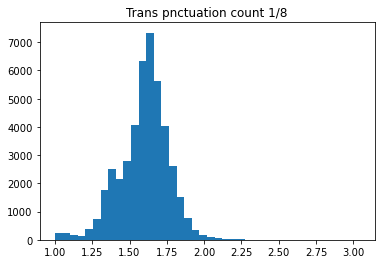

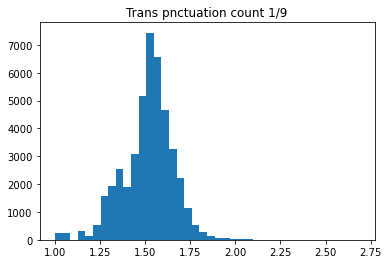

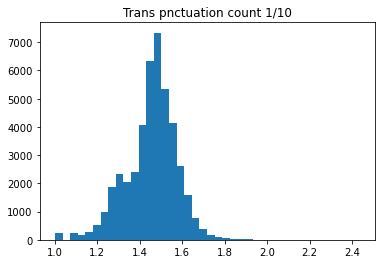

In [235]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.hist((dfn['count_punct'])**(1/i),bins=40)
    plt.title('Trans pnctuation count 1/{}'.format(str(i)))
    plt.show()

In [256]:
#count_punct 1/9 has the best distrobution
dfn['count_punct']=(dfn['count_punct'])**(1/9)

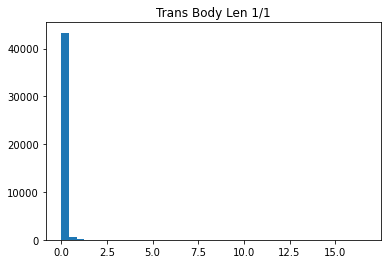

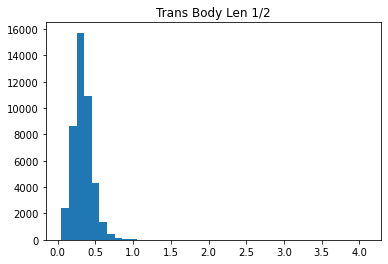

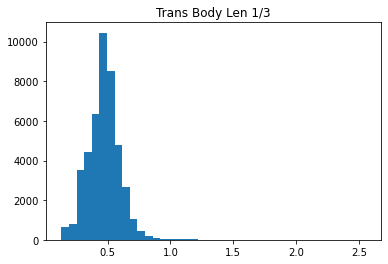

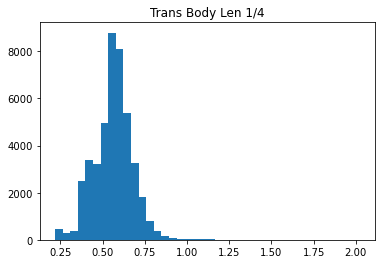

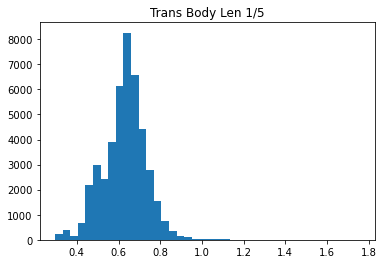

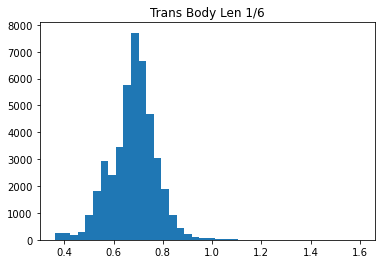

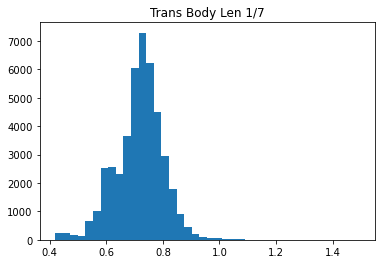

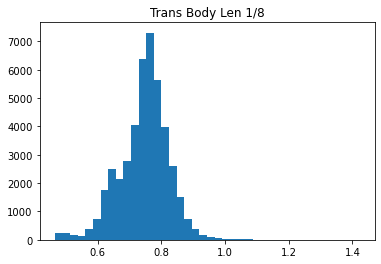

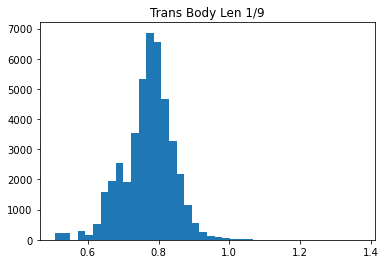

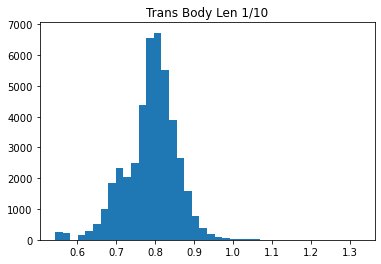

In [239]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.hist((dfn['try2'])**(1/i),bins=40)
    plt.title('Trans Body Len 1/{}'.format(str(i)))
    plt.show()

In [259]:
#puntuation % best at 1/10
dfn['try2']=(dfn['try2'])**(1/10)

Text(0.5, 1.0, 'punct % dist')

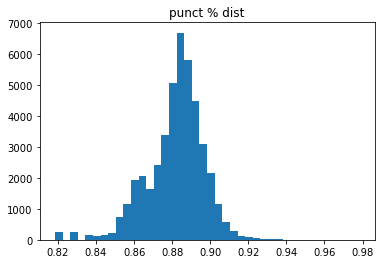

In [260]:
bins = np.linspace(0,0.1, 40)
plt.hist(dfn['try2'],bins=40)
plt.title('punct % dist')

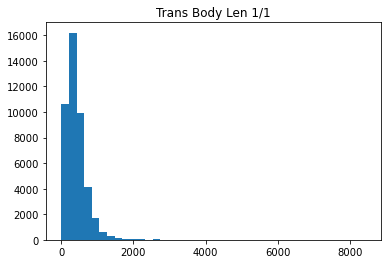

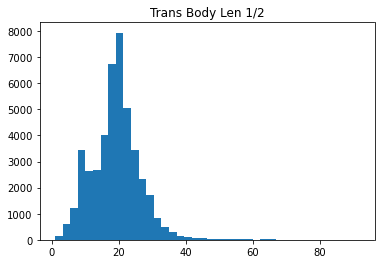

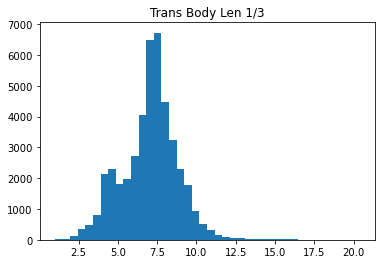

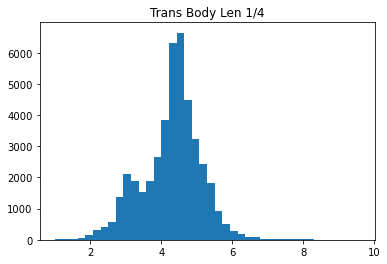

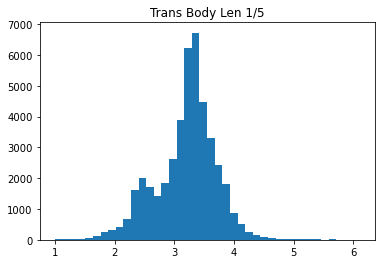

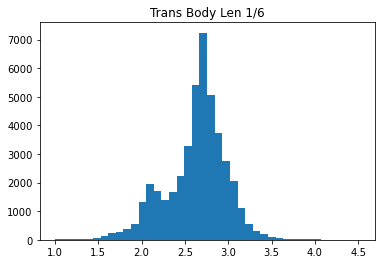

In [242]:
for i in [1,2,3,4,5,6]:
    plt.hist((dfn['count_ws'])**(1/i),bins=40)
    plt.title('Trans whitespace count 1/{}'.format(str(i)))
    plt.show()

In [258]:
#whitespace count best at 1/6
dfn['count_ws']=(dfn['count_ws'])**(1/6)

In [299]:
def count_twitters_user(x):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = len(re.findall(twitter_username_re, x))
    return count

In [300]:
dfn = pd.read_csv('transformed_data.csv')

In [311]:
twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
dfn['twitter'] = dfn.text.apply(lambda x: len(re.findall(twitter_username_re, x)))
dfn.head()

,title,text,value,try,count_punct,try2,count_ws,body_len,twitter
0,‘Verbal Diarrhea’: Trump Gives Most Astonishi...,It s no secret that Donald Trump talks to his ...,False,"[',', '.', ',', ',', '.', '.', '.', ',', ',', ...",1.613216,0.892244,2.928678,1.303728,4
1,China calls for restraint after a U.S. B-1B bo...,BEIJING (Reuters) - China said on Wednesday it...,True,"['(', ')', '-', ',', '.', '.', '-', '-', '.', ...",1.291550,0.857009,1.912931,1.204411,0
2,U.S. Supreme Court takes up major transgender ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,True,"['(', ')', '-', '.', '.', '-', '.', '.', '.', ...",1.656672,0.896600,3.058773,1.321101,0
3,Cameroon Anglophone regions to shut Nigeria bo...,YAOUNDE (Reuters) - The government of one of C...,True,"['(', ')', '-', '-', '.', '.', ',', '.', ',', ...",1.514820,0.882098,2.701832,1.290223,0
4,Electors Will NOT Be Given Intelligence Brief...,Members of the Electoral College will not be r...,False,"['.', ',', '.', ',', ',', ',', ',', '.', ',', ...",1.479668,0.878383,2.716675,1.290816,0


In [314]:
dfn[dfn['twitter']!=0]

,title,text,value,try,count_punct,try2,count_ws,body_len,twitter
0,‘Verbal Diarrhea’: Trump Gives Most Astonishi...,It s no secret that Donald Trump talks to his ...,False,"[',', '.', ',', ',', '.', '.', '.', ',', ',', ...",1.613216,0.892244,2.928678,1.303728,4
14,CRAZY VIDEO: Anarchist Tries To Burn American ...,A protester at the RNC in Cleveland attempted ...,False,"[';', '.', '.', '!', ':', '/', '/', '.', '/', ...",1.387023,0.868089,2.015328,1.214339,1
21,Richard Spencer’s Fascist Goon Squad Couldn’t...,"Oooh, big scary Richard Spencer! The milky-whi...",False,"[',', '!', '-', '.', ',', '-', '-', ',', '.', ...",1.700655,0.900769,2.943194,1.308256,5
30,Trump Just Literally Gave The WWE A Cabinet P...,Just when you thought things couldn t get craz...,False,"[',', '-', '-', ',', '.', ':', '.', '.', '-', ...",1.557716,0.886519,2.627439,1.282212,1
43,Ron Paul Highlights Real List of Mainstream ‘F...,RTFormer congressman Ron Paul revealed a list...,False,"['.', ',', ',', '.', ',', ',', '.', ',', '.', ...",1.631721,0.894026,2.821013,1.298005,6
...,...,...,...,...,...,...,...,...,...
44099,BRILLIANT! President Trump Offers Congress Har...,AP President Donald Trump has told congressio...,False,"['-', ',', '.', '.', '.', '-', ',', ',', '.', ...",1.526477,0.883302,2.660958,1.283977,1
44100,WOW! Hillary’s VP Pick Tim Kaine Gets Only 30 ...,BREAKING: #TimKaine rally only about 30 people...,False,"[':', '#', '.', '#', '#', '.', '.', '/', '(', ...",1.429969,0.872867,2.015328,1.222848,3
44104,EU calls report on May-Juncker talks a smear,BRUSSELS (Reuters) - The European Commission s...,True,"['(', ')', '-', '-', '.', '.', ',', ',', '-', ...",1.600724,0.890985,2.906606,1.302100,3
44114,Agency Targets Trump In First Ever Protest Fr...,This past January we all witnessed one of the ...,False,"[',', ',', '.', ',', ',', ',', ',', '.', ',', ...",1.587401,0.889544,2.653409,1.280426,3


C:\Users\InnovusDrac\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


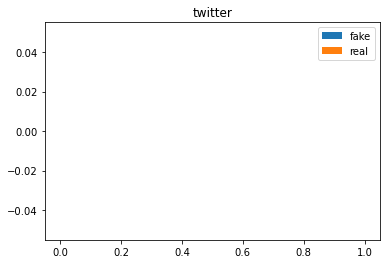

In [312]:

plt.hist(dfn[dfn['value']=='false']['twitter'], label='fake')
plt.hist(dfn[dfn['value']=='true']['twitter'], label='real')
plt.legend(loc='upper right')
plt.title('twitter')
plt.show()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([ 0.        ,  0.25641026,  0.51282051,  0.76923077,  1.02564103,
         1.28205128,  1.53846154,  1.79487179,  2.05128205,  2.30769231,
         2.56410256,  2.82051282,  3.07692308,  3.33333333,  3.58974359,
         3.84615385,  4.1025641 ,  4.35897436,  4.61538462,  4.87179487,
         5.12820513,  5.38461538,  5.64102564,  5.8974359 ,  6.15384615,
         6.41025641,  6.66666667,  6.92307692,  7.17948718,  7.43589744,
         7.69230769,  7.94871795,  8.20512821,  8.46153846,  8.71794872,
         8.97435897,  9.23076923,  9.48717949,  9.74358974, 10.        ]),
 <a list of 39 Patch objects>)

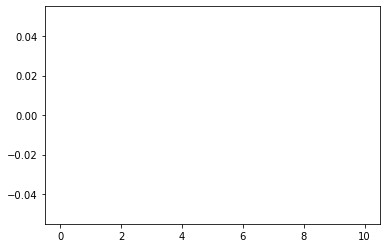

In [320]:
plt.hist(dfn[dfn['value']=='False']['twitter'], bins, alpha=0.5, label='fake')

In [304]:
dfn = dfn.sample(frac = 1)
dfn= dfn.reset_index()
del dfn['index']
dfn.head()

,title,text,value,try,count_punct,try2,count_ws,body_len,twitter
0,‘Verbal Diarrhea’: Trump Gives Most Astonishi...,It s no secret that Donald Trump talks to his ...,False,"[',', '.', ',', ',', '.', '.', '.', ',', ',', ...",1.613216,0.892244,2.928678,1.303728,4
1,China calls for restraint after a U.S. B-1B bo...,BEIJING (Reuters) - China said on Wednesday it...,True,"['(', ')', '-', ',', '.', '.', '-', '-', '.', ...",1.291550,0.857009,1.912931,1.204411,0
2,U.S. Supreme Court takes up major transgender ...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,True,"['(', ')', '-', '.', '.', '-', '.', '.', '.', ...",1.656672,0.896600,3.058773,1.321101,0
3,Cameroon Anglophone regions to shut Nigeria bo...,YAOUNDE (Reuters) - The government of one of C...,True,"['(', ')', '-', '-', '.', '.', ',', '.', ',', ...",1.514820,0.882098,2.701832,1.290223,0
4,Electors Will NOT Be Given Intelligence Brief...,Members of the Electoral College will not be r...,False,"['.', ',', '.', ',', ',', ',', ',', '.', ',', ...",1.479668,0.878383,2.716675,1.290816,0


In [321]:
dfn.to_csv('transformed_data.csv',index=False)
df2.to_csv('clean_text.csv',index=False)
#X_counts.to_csv('vectorized_data.csv')